In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import gaussian_kde


In [2]:
# Read Footprint Data into notebook
footprint_data1 = pd.read_csv("Resources/countries.csv")
footprint_data1.head(1)

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.3,0.2,0.08,0.18,0.0,...,0.24,0.2,0.02,0.0,0.04,0.5,-0.3,0.46,1.6,6


In [3]:
#Change names of Countries to match the Country names in the happiness data
replacements = {'Country': {
r'Libyan Arab Jamahiriya':'Libya',
r'Macedonia TFYR':'Macedonia',
r'Russian Federation':'Russia',
r'Syrian Arab Republic':'Syria',
r'Tanzania, United Republic of':'Tanzania',
r'United States of America':'United States',
r'Venezuela, Bolivarian Republic of':'Venezuela'}}

footprint_data1.replace(replacements, regex=True, inplace=True)

footprint_data1.head(1)

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.3,0.2,0.08,0.18,0.0,...,0.24,0.2,0.02,0.0,0.04,0.5,-0.3,0.46,1.6,6


In [4]:
#Read Happiness data into notebook
Happiness_data1 = pd.read_csv("Resources/2016.csv")
Happiness_data1.head(1)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


In [5]:
#Merge Happiness and Footprint data
merge1 = footprint_data1.merge(Happiness_data1, left_on='Country', right_on='Country')
merge1

,Country,Region_x,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,Middle East/Central Asia,29.82,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,Northern/Eastern Europe,3.16,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,Africa,38.48,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Angola,Africa,20.82,0.520000,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
4,Argentina,Latin America,41.09,0.830000,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Uzbekistan,Middle East/Central Asia,28.54,0.670000,"$1,560.85",0.62,0.13,0.08,1.41,0.00,...,5.987,5.896,6.078,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638
134,Venezuela,Latin America,29.96,0.763846,"$10,237.80",0.45,0.74,0.12,2.13,0.09,...,6.084,5.973,6.195,1.13367,1.03302,0.61904,0.19847,0.08304,0.04250,2.97468
135,Yemen,Middle East/Central Asia,23.85,0.500000,"$1,302.30",0.34,0.14,0.04,0.42,0.04,...,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295
136,Zambia,Africa,14.08,0.580000,"$1,740.64",0.19,0.18,0.33,0.24,0.01,...,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991


In [6]:
#Drop the duplicate country column
merge2 = merge1.drop(merge1.columns[-1],1)
merge2.head(1)

,Country,Region_x,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.3,0.2,0.08,0.18,0.0,...,154,3.36,3.288,3.432,0.38227,0.11037,0.17344,0.1643,0.07112,0.31268


In [7]:
#Output to excel
#merge2.to_excel("output3.xlsx") 

In [8]:
merge2.drop(['Region_x','Cropland Footprint','Grazing Footprint','Forest Footprint','Carbon Footprint','Fish Footprint','Cropland','Grazing Land','Forest Land','Fishing Water','Urban Land','Data Quality','Lower Confidence Interval','Upper Confidence Interval'],axis=1, inplace=True)

In [9]:
merge2

,Country,Population (millions),HDI,GDP per Capita,Total Ecological Footprint,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Region_y,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Afghanistan,29.82,0.460000,$614.66,0.79,0.50,-0.30,0.46,1.60,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268
1,Albania,3.16,0.730000,"$4,534.37",2.21,1.18,-1.03,1.27,1.87,Central and Eastern Europe,109,4.655,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840
2,Algeria,38.48,0.730000,"$5,430.57",2.12,0.59,-1.53,1.22,3.61,Middle East and Northern Africa,38,6.355,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044
3,Angola,20.82,0.520000,"$4,665.91",0.93,2.55,1.61,0.54,0.37,Sub-Saharan Africa,141,3.866,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071
4,Argentina,41.09,0.830000,"$13,540.00",3.14,6.92,3.78,1.82,0.45,Latin America and Caribbean,26,6.650,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Uzbekistan,28.54,0.670000,"$1,560.85",2.32,0.92,-1.40,1.34,2.52,Central and Eastern Europe,49,5.987,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326
134,Venezuela,29.96,0.763846,"$10,237.80",3.57,2.78,-0.79,2.06,1.28,Latin America and Caribbean,44,6.084,1.13367,1.03302,0.61904,0.19847,0.08304,0.04250
135,Yemen,23.85,0.500000,"$1,302.30",1.03,0.50,-0.53,0.59,2.06,Middle East and Northern Africa,147,3.724,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821
136,Zambia,14.08,0.580000,"$1,740.64",0.99,2.23,1.24,0.57,0.44,Sub-Saharan Africa,106,4.795,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866


In [10]:
merge2.to_csv('Resources/Merged_cols_selected.csv')                     

In [11]:
#QUESTION   
merge2.groupby('Country')[['Happiness Rank','Economy (GDP per Capita)']].corr()

Happiness Rank  Economy (GDP per Capita)
Country                                                                       
Afghanistan Happiness Rank                       NaN                       NaN
            Economy (GDP per Capita)             NaN                       NaN
Albania     Happiness Rank                       NaN                       NaN
            Economy (GDP per Capita)             NaN                       NaN
Algeria     Happiness Rank                       NaN                       NaN
...                                              ...                       ...
Yemen       Economy (GDP per Capita)             NaN                       NaN
Zambia      Happiness Rank                       NaN                       NaN
            Economy (GDP per Capita)             NaN                       NaN
Zimbabwe    Happiness Rank                       NaN                       NaN
            Economy (GDP per Capita)             NaN                       NaN

[276 rows x 2 columns]

In [12]:
# Correlation between Happiness Score and GDP
merge2[['Happiness Rank','Economy (GDP per Capita)']].corr()

,Happiness Rank,Economy (GDP per Capita)
Happiness Rank,1.000000,-0.795044
Economy (GDP per Capita),-0.795044,1.000000


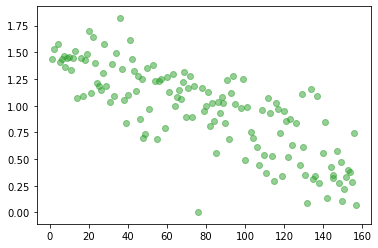

In [13]:
# plot happiness score vs GDP

plt.scatter(merge2["Happiness Rank"], merge2["Economy (GDP per Capita)"], color = "tab:green", alpha=0.5)

In [14]:
#HappGDP_std = merge2.groupby('Country')['Economy (GDP per Capita)'].var()
#HappGDP_std
#np.std(merge2['Economy (GDP per Capita)'])


In [15]:
merge2[['Happiness Rank','Population (millions)']].corr()

,Happiness Rank,Population (millions)
Happiness Rank,1.000000,0.023551
Population (millions),0.023551,1.000000


In [16]:
merge2[['Happiness Rank', 'Total Ecological Footprint']].corr()

,Happiness Rank,Total Ecological Footprint
Happiness Rank,1.000000,-0.674515
Total Ecological Footprint,-0.674515,1.000000


In [17]:
merge2[['Happiness Rank','Biocapacity Deficit or Reserve']].corr()

,Happiness Rank,Biocapacity Deficit or Reserve
Happiness Rank,1.000000,0.014911
Biocapacity Deficit or Reserve,0.014911,1.000000


In [18]:
merge2[['Happiness Rank','Family']].corr()

,Happiness Rank,Family
Happiness Rank,1.000000,-0.729622
Family,-0.729622,1.000000


In [19]:
merge2[['Happiness Rank','Health (Life Expectancy)']].corr()

,Happiness Rank,Health (Life Expectancy)
Happiness Rank,1.000000,-0.766725
Health (Life Expectancy),-0.766725,1.000000


In [20]:
merge2[['Happiness Rank','Freedom']].corr()

,Happiness Rank,Freedom
Happiness Rank,1.000000,-0.561765
Freedom,-0.561765,1.000000


In [21]:
merge2[['Happiness Rank','Generosity']].corr()

,Happiness Rank,Generosity
Happiness Rank,1.00000,-0.12585
Generosity,-0.12585,1.00000


In [22]:
# import seaborn as sns
# sns.lmplot(x='Economy (GDP per Capita)', y='Happiness Rank', data=merge2)

In [23]:
# gdpsort.to_excel('gdpsort.xlsx') 

In [24]:
merge2[['Happiness Rank','Earths Required']].corr()

,Happiness Rank,Earths Required
Happiness Rank,1.000000,-0.674565
Earths Required,-0.674565,1.000000


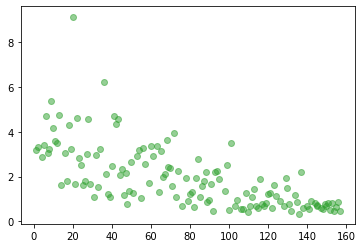

In [25]:
plt.scatter(merge2["Happiness Rank"], merge2["Earths Required"], color = "tab:green", alpha=0.5)

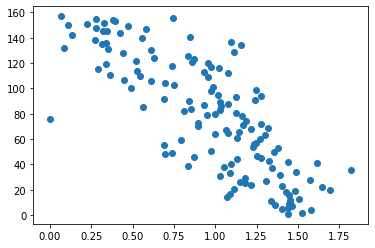

In [26]:
x_axis = merge2['Economy (GDP per Capita)']
y_axis = merge2['Happiness Rank']
plt.scatter(x_axis, y_axis)

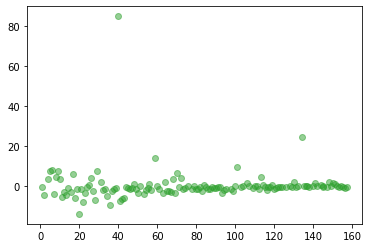

In [27]:
plt.scatter(merge2["Happiness Rank"], merge2["Biocapacity Deficit or Reserve"], color = "tab:green", alpha=0.5)

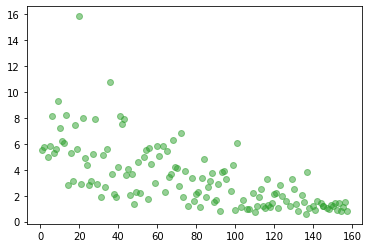

In [28]:
plt.scatter(merge2["Happiness Rank"], merge2["Total Ecological Footprint"], color = "tab:green", alpha=0.5)

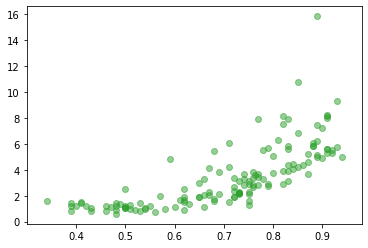

In [29]:
plt.scatter(merge2["HDI"], merge2["Total Ecological Footprint"], color = "tab:green", alpha=0.5)

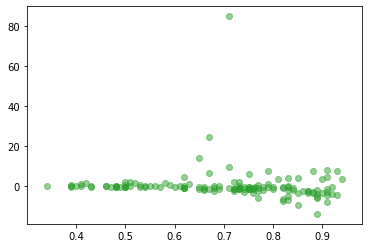

In [30]:
plt.scatter(merge2["HDI"], merge2["Biocapacity Deficit or Reserve"], color = "tab:green", alpha=0.5)

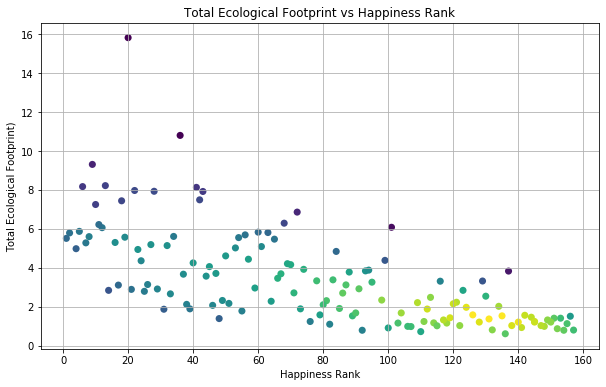

In [31]:
y = merge2['Total Ecological Footprint']
x = merge2['Happiness Rank']

xy = np.vstack([x,y])

z = gaussian_kde(xy)(xy)

plt.figure(figsize=(10,6))

plt.scatter(x, y, c=z, s=50, edgecolor='')

plt.ylabel('Total Ecological Footprint)')
plt.xlabel('Happiness Rank')
plt.title('Total Ecological Footprint vs Happiness Rank')
plt.grid(b=True)

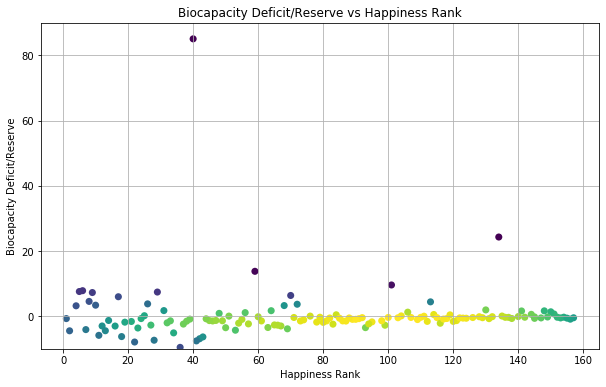

In [32]:
y = merge2['Biocapacity Deficit or Reserve']
x = merge2['Happiness Rank']

xy = np.vstack([x,y])

z = gaussian_kde(xy)(xy)

plt.figure(figsize=(10,6))

plt.scatter(x, y, c=z, s=50, edgecolor='')

plt.ylabel('Biocapacity Deficit/Reserve')
plt.xlabel('Happiness Rank')
plt.title('Biocapacity Deficit/Reserve vs Happiness Rank')
plt.ylim(bottom= -10)
plt.grid(b=True)

In [33]:
regroup_country = merge2.groupby(["Country"])
regroup_country

In [34]:
us = regroup_country.groups["United States"]
us = regroup_country.get_group("United States")
us

,Country,Population (millions),HDI,GDP per Capita,Total Ecological Footprint,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Region_y,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
131,United States,317.5,0.91,"$49,725.00",8.22,3.76,-4.46,4.75,2.19,North America,13,7.104,1.50796,1.04782,0.779,0.48163,0.14868,0.41077


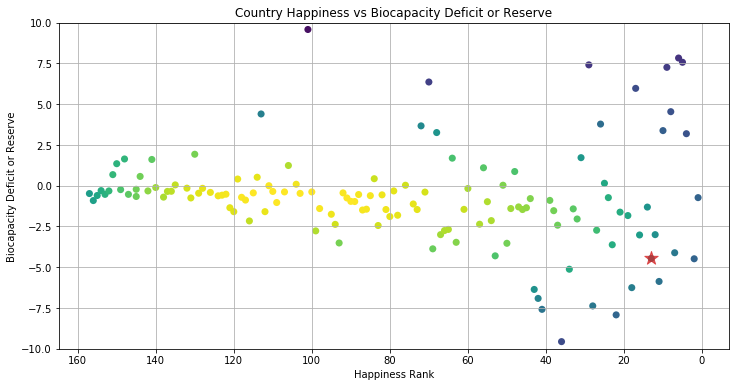

In [35]:
# where is the US? happiness rank and biocapacity deficit/reserve
x_axis1 = us['Happiness Rank']
y_axis1 = us['Biocapacity Deficit or Reserve']

x_axis2 = merge2['Happiness Rank']
y_axis2 = merge2['Biocapacity Deficit or Reserve']

plt.figure(figsize=(12,6))

# (code from url: 
# https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib)
# (User: Joe Kington)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

plt.scatter(x, y, c=z, s=50, edgecolor='')

plt.scatter(x_axis1, y_axis1, marker='*', facecolors='tab:red', s=200, alpha=0.75)

plt.ylabel('Biocapacity Deficit or Reserve')
plt.xlabel('Happiness Rank')
plt.title('Country Happiness vs Biocapacity Deficit or Reserve')
plt.grid(b=True)
plt.gca().invert_xaxis()
plt.ylim(top=10, bottom= -10)

plt.show()

In [36]:
# def_reserve_df
def_reserve_df = merge2["Biocapacity Deficit or Reserve"]

# calculate quartiles and identify outliers
quartiles = def_reserve_df.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Biocapacity Deficit or Reserve is: {lowerq}")
print(f"The upper quartile of Biocapacity Deficit or Reserve is: {upperq}")
print(f"The interquartile range of Biocapacity Deficit or Reserve is: {iqr}")
print(f"The the median of Biocapacity Deficit or Reserve is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Check to see if there are outilers
print(f"Biocapacity Deficit or Reserve: {def_reserve_df.min()}")
print(f"Biocapacity Deficit or Reserve: {def_reserve_df.max()}")

# cef_box = [ tumor_volume for tumor_volume in cef_tum_vol ]

The lower quartile of Biocapacity Deficit or Reserve is: -1.8250000000000002
The upper quartile of Biocapacity Deficit or Reserve is: 0.03
The interquartile range of Biocapacity Deficit or Reserve is: 1.8550000000000002
The the median of Biocapacity Deficit or Reserve is: -0.6799999999999999 
Values below -4.6075 could be outliers.
Values above 2.8125 could be outliers.
Biocapacity Deficit or Reserve: -14.14
Biocapacity Deficit or Reserve: 85.08


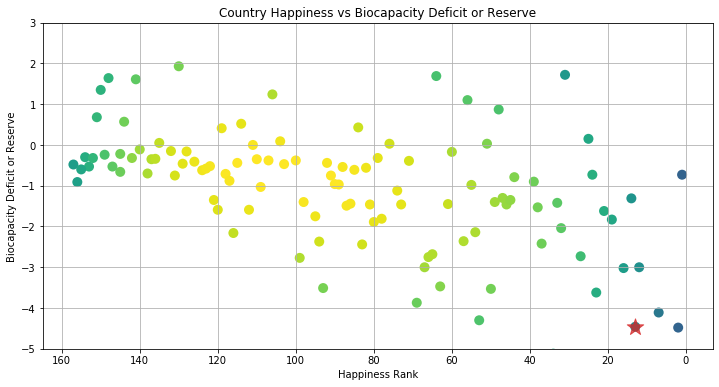

In [37]:
# where is the US? happiness rank and biocapacity deficit/reserve
x_axis1 = us['Happiness Rank']
y_axis1 = us['Biocapacity Deficit or Reserve']

x_axis2 = merge2['Happiness Rank']
y_axis2 = merge2['Biocapacity Deficit or Reserve']

plt.figure(figsize=(12,6))

# (code from url: 
# https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib)
# (User: Joe Kington)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

plt.scatter(x, y, c=z, s=100, edgecolor='')

plt.scatter(x_axis1, y_axis1, marker='*', facecolors='tab:red', s=300, alpha=0.75)

plt.ylabel('Biocapacity Deficit or Reserve')
plt.xlabel('Happiness Rank')
plt.title('Country Happiness vs Biocapacity Deficit or Reserve')
plt.grid(b=True)
plt.gca().invert_xaxis()
plt.ylim(top=3, bottom=-5)

plt.show()

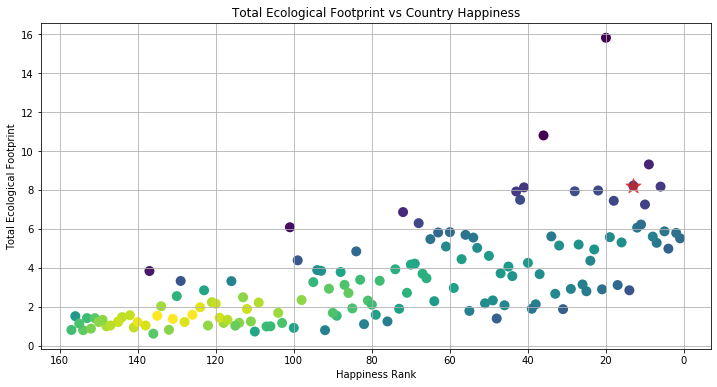

In [39]:
# where is the US? happiness rank and biocapacity deficit/reserve
x_axis3 = us['Happiness Rank']
y_axis3 = us['Total Ecological Footprint']

x = merge2['Happiness Rank']
y = merge2['Total Ecological Footprint']

plt.figure(figsize=(12,6))

# (code from url: 
# https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib)
# (User: Joe Kington)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

plt.scatter(x, y, c=z, s=100, edgecolor='')

plt.scatter(x_axis3, y_axis3, marker='*', facecolors='tab:red', s=250, alpha=0.75)

plt.ylabel('Total Ecological Footprint')
plt.xlabel('Happiness Rank')
plt.title('Total Ecological Footprint vs Country Happiness')
plt.grid(b=True)
plt.gca().invert_xaxis()
# plt.ylim(top=10, bottom= -10)

plt.show()